In [173]:
import numpy as np
from hmmlearn.hmm import MultinomialHMM
import pandas as pd
from urllib.request import Request, urlopen


In [248]:
url = 'https://raw.githubusercontent.com/sergiuoprea/Hand-Gesture-Recognition-Datasets/master/Original_Dataset.csv'
url_request  = Request(url)
data = urlopen(url_request)
df = pd.read_csv(data)
len(df)

350

In [249]:
df.shape

(350, 781)

In [250]:
df

,LC_X_1,LC_X_2,LC_X_3,LC_X_4,LC_X_5,LC_X_6,LC_X_7,LC_X_8,LC_X_9,LC_X_10,...,RD_22,RD_23,RD_24,RD_25,RD_26,RD_27,RD_28,RD_29,RD_30,Gesture
0,307,389,259,259,259,259,259,258,258,259,...,1001,1001,1004,1007,1013,1013,1016,1016,1019,ZoomIn
1,340,340,340,340,339,339,340,339,338,338,...,1007,1007,1007,1010,1010,1010,1010,1013,1010,ZoomIn
2,260,263,266,266,270,271,271,271,271,271,...,962,959,0,957,957,959,959,962,962,ZoomIn
3,338,339,338,337,337,337,337,337,336,335,...,1013,1010,1010,1010,1013,1010,1010,1013,1010,ZoomIn
4,319,240,240,318,241,318,318,318,318,318,...,1016,1016,1022,1022,1013,1016,1016,1019,1019,ZoomIn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,309,309,309,309,309,309,309,309,310,...,0,0,0,0,0,0,0,0,0,Press
346,301,300,302,302,302,301,299,300,301,302,...,0,0,0,0,0,0,0,0,0,Press
347,298,295,294,292,292,290,290,288,287,287,...,0,0,0,0,0,0,0,0,0,Press
348,278,278,278,277,278,277,276,276,276,276,...,0,0,0,0,0,0,0,0,0,Press


In [251]:
print(df.keys())

Index(['LC_X_1', 'LC_X_2', 'LC_X_3', 'LC_X_4', 'LC_X_5', 'LC_X_6', 'LC_X_7',
       'LC_X_8', 'LC_X_9', 'LC_X_10',
       ...
       'RD_22', 'RD_23', 'RD_24', 'RD_25', 'RD_26', 'RD_27', 'RD_28', 'RD_29',
       'RD_30', 'Gesture'],
      dtype='object', length=781)


In [252]:
# LC_X_1 to LC_X_30 ; LC_Y_1 to LC_Y_30 ; RC_X_1 to RC_X_30 ; RC_Y_1 to RC_Y_30
# create a 350 x 30 x 4 matrix

left_centroid_x = ['LC_X_' + str(i) for i in range(1, 31)]
left_centroid_y = ['LC_Y_' + str(i) for i in range(1, 31)]
right_centroid_x = ['RC_X_' + str(i) for i in range(1, 31)]
right_centroid_y = ['RC_Y_' + str(i) for i in range(1, 31)]


In [253]:
df.loc[:, left_centroid_x]

,LC_X_1,LC_X_2,LC_X_3,LC_X_4,LC_X_5,LC_X_6,LC_X_7,LC_X_8,LC_X_9,LC_X_10,...,LC_X_21,LC_X_22,LC_X_23,LC_X_24,LC_X_25,LC_X_26,LC_X_27,LC_X_28,LC_X_29,LC_X_30
0,307,389,259,259,259,259,259,258,258,259,...,223,221,219,217,213,211,210,207,204,202
1,340,340,340,340,339,339,340,339,338,338,...,242,241,240,239,238,237,236,235,234,233
2,260,263,266,266,270,271,271,271,271,271,...,251,249,248,0,243,242,238,237,234,234
3,338,339,338,337,337,337,337,337,336,335,...,243,242,242,241,239,236,234,231,230,227
4,319,240,240,318,241,318,318,318,318,318,...,221,219,218,216,215,214,211,209,207,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,309,309,309,309,309,309,309,309,310,...,307,307,307,307,308,309,310,311,311,312
346,301,300,302,302,302,301,299,300,301,302,...,302,302,302,299,299,299,294,297,295,297
347,298,295,294,292,292,290,290,288,287,287,...,285,285,286,286,286,287,287,287,287,286
348,278,278,278,277,278,277,276,276,276,276,...,272,272,271,270,269,269,269,267,267,268


In [255]:
# this will be our normalization factor for all the sequences
max_seq_entry = max(lcx_np.max(), lcy_np.max(), rcx_np.max(), rcy_np.max())
print('Normalization factor: ' + str(max_seq_entry))

lcx_np = df.loc[:, left_centroid_x].to_numpy()
lcx_np_norm = lcx_np / max_seq_entry
lcy_np = df.loc[:, left_centroid_y].to_numpy()
lcy_np_norm = lcy_np / max_seq_entry
rcx_np = df.loc[:, right_centroid_x].to_numpy()
rcx_np_norm = rcx_np / max_seq_entry
rcy_np = df.loc[:, right_centroid_y].to_numpy()
rcy_np_norm = rcy_np / max_seq_entry

# lcx_np = df.loc[:, left_centroid_x].to_numpy()
# lcx_np_norm = lcx_np / lcx_np.max()
# lcy_np = df.loc[:, left_centroid_y].to_numpy()
# lcy_np_norm = lcy_np / lcy_np.max()
# rcx_np = df.loc[:, right_centroid_x].to_numpy()
# rcx_np_norm = rcx_np / rcx_np.max()
# rcy_np = df.loc[:, right_centroid_y].to_numpy()
# rcy_np_norm = rcy_np / rcy_np.max()

# print(rcy_np.shape)

# print(lcx_np.max())
# print(lcy_np.max())
# print(rcx_np.max())
# print(rcy_np.max())

# print(rcy_np_norm)

X = np.stack((lcx_np_norm, lcy_np_norm, rcx_np_norm, rcy_np_norm), axis=2)
print(X.shape)

Normalization factor: 503
(350, 30, 4)


In [256]:
y = df['Gesture'].to_numpy()
print(y.shape)

(350,)


In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
# print(y_enc)

In [259]:
# print(len(le.classes_))
# print(le.transform(le.classes_))
# print(X[0:50,:,:].shape)
# np.where(y_enc == 5)
# print(X[np.where(y_enc == 6)].shape)

In [260]:
def split_data_by_class(X, y, class_label):
    y_indices = np.where(y_enc == class_label)
    return X[y_indices], y[y_indices]

In [324]:
data_by_class = [] # TODO: use this?
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
# print(le.transform(le.classes_)[0])

models = []
tests = []
for class_label in le.transform(le.classes_):
    X_by_class, y_by_class = split_data_by_class(X, y_enc, class_label)
    X_train, X_test, y_train, y_test = train_test_split(X_by_class, y_by_class, test_size=0.1)
    # train model & run prediction loop
    print('Training model for label: {}'.format(class_label))
    model = hmm.GaussianHMM(n_components=4, n_iter=100)
    
    # HACK: concatenate all the dimensions (x, y coordinates) and train the model on that
#     print(X_train.shape)
#     print(X_train[:,:,0])
    # assuming it's 3 dimensional data
#     print(X_train.transpose(2,0,1).reshape(-1, X_train.shape[1]))
    concatenated_x = X_train.transpose(2,0,1).reshape(-1, X_train.shape[1])
    model.fit(concatenated_x)
    models.append(model)
#     Z2 = model.predict(X_test[0])
    # concatenate the test data as well for the test
    concatenated_x_test = X_test.transpose(2,0,1).reshape(-1, X_test.shape[1])
    tests.append((concatenated_x_test, le.inverse_transform([class_label])[0]))
#     print(model.score(concatenated_x_test))


################# now for testing ##########################
num_correct = 0
for test_index, test in enumerate(tests):
    best_model_index = -1
    best_model_score = -9999999999999
    for index, model in enumerate(models):
        model_score_test = model.score(test[0])
#         print('Currently evaluated model score: ' + str(model_score_test))
        if model_score_test > best_model_score:
#             print('Winning model number: ' + str(index))
            best_model_index = index
            best_model_score = model_score_test
        
    print('\n')    
    print('For test data: ' + str(test_index))
    print('Prediction is: ' + str(le.inverse_transform([best_model_index])[0]) + ' with score: ' + str(best_model_score))
    print('Actual is : ' + str(test[1]))
    if (le.inverse_transform([best_model_index])[0] == test[1]):
        num_correct += 1
  
#########################
print('\n')
print('Num of correct predictions out of 7 : ' + str(num_correct))
print('Accuracy in prediction: ' + str(num_correct/7.0))
# print(Z2)

Training model for label: 0
Training model for label: 1
Training model for label: 2
Training model for label: 3
Training model for label: 4
Training model for label: 5
Training model for label: 6


For test data: 0
Prediction is: MoveDown with score: 1359.5001444444122
Actual is : MoveDown


For test data: 1
Prediction is: MoveLeft with score: 1514.4726850746983
Actual is : MoveLeft


For test data: 2
Prediction is: MoveRight with score: 1444.1861301279614
Actual is : MoveRight


For test data: 3
Prediction is: MoveUp with score: 1521.6869167353268
Actual is : MoveUp


For test data: 4
Prediction is: Press with score: 1623.029861708077
Actual is : Press


For test data: 5
Prediction is: ZoomIn with score: 1044.0497841681158
Actual is : ZoomIn


For test data: 6
Prediction is: ZoomOut with score: 1113.753084310962
Actual is : ZoomOut


Num of correct predictions out of 7 : 7
Accuracy in prediction: 1.0


In [241]:
# np.concatenate([X_train[:,:,0], X_train[:,:,1]]).shape

(90, 30)

In [272]:
# X_train[:,:,0].shape
#################3 Hyper Parameter Search ###############################

# test hyperparameters for class 0
X_by_class, y_by_class = split_data_by_class(X, y_enc, 0)
X_train, X_test, y_train, y_test = train_test_split(X_by_class, y_by_class, test_size=0.1)

concatenated_x = X_train.transpose(2,0,1).reshape(-1, X_train.shape[1])
best_score = -999999999
best_hyper_params = {'n_components': -1, 'covariance_type': ''}
# train model & run prediction loop
for n_components in [1, 2, 3, 4]:
    for covariance_type in ['full', 'diag']:
        print('Training model for label: {} with n_components: {} and covariance_type: {}'.format(class_label, n_components, covariance_type))
        model = hmm.GaussianHMM(n_components=n_components, n_iter=100)
        model.fit(concatenated_x)
        model_score = model.score(concatenated_x)
        print('Model score: ' + str(model_score))
        if model_score > best_score:
            best_hyper_params['n_components'] = n_components
            best_hyper_params['covariance_type'] = covariance_type
            
print('\nBest model:')
print(best_hyper_params)

Training model for label: 6 with n_components: 1 and covariance_type: full
Model score: 183.10805040849732
Training model for label: 6 with n_components: 1 and covariance_type: diag
Model score: 183.10805040849732
Training model for label: 6 with n_components: 2 and covariance_type: full
Model score: 11069.162696200328
Training model for label: 6 with n_components: 2 and covariance_type: diag
Model score: 11069.162696200328
Training model for label: 6 with n_components: 3 and covariance_type: full
Model score: 12996.82606990215
Training model for label: 6 with n_components: 3 and covariance_type: diag
Model score: 12996.82606990215
Training model for label: 6 with n_components: 4 and covariance_type: full
Model score: 13685.074888844414
Training model for label: 6 with n_components: 4 and covariance_type: diag
Model score: 13685.07488884442

Best model:
{'n_components': 4, 'covariance_type': 'diag'}


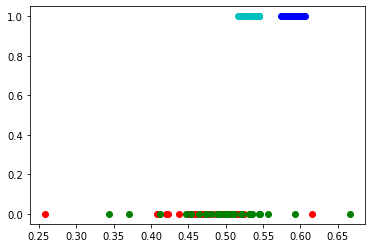

In [292]:
# print(concatenated_x.shape)
mean_concatenated = np.mean(concatenated_x)
variance_concatenated = np.var(concatenated_x)

sampled_data, _ = model.sample(180)
# print(sampled_data.shape)
mean_sampled = np.mean(sampled_data)
var_sampled = np.var(sampled_data)

## just plot the sequences
from matplotlib import pyplot as plt

x, y = concatenated_x[0,:], np.ones_like(concatenated_x[0,:])
plt.scatter(x, y, color='c')
x, y = sampled_data[0,:], np.zeros_like(sampled_data[0,:])
plt.scatter(x, y, color='r')

x, y = concatenated_x[1,:], np.ones_like(concatenated_x[1,:])
plt.scatter(x, y, color='b')
x, y = sampled_data[1,:], np.zeros_like(sampled_data[1,:])
plt.scatter(x, y, co lor='g')

plt.show()

In [294]:
# model.__dict__

In [295]:
#         self.EmssProbs = np.random.rand(self.StatesNum, self.ObservationNum)
# rounded_X = np.rint(X * max_seq_entry)
# print(rounded_X)

In [322]:
def forward_pass(sequence_to_evaluate, transition_matrix, num_states=4):
    # TODO: validation of end_probs calculation
    end_probs = np.array([0.1]*num_states)
    # node values stored during forward algorithm
    forward_vals = np.zeros((num_states, len(sequence_to_evaluate)))

    for i, sequence_val in enumerate(sequence_to_evaluate):
        for j in range(num_states):
            if (i == 0):
                forward_vals[j, i] = start_probs[j] * emission_probabilities[j, sequence_val.astype(np.int32)]
            else:
                values = [forward_vals[k, i - 1] * emission_probabilities[j, sequence_val.astype(np.int32)] * transition[k, j] for k in
                          range(num_states)]
                forward_vals[j, i] = sum(values)

    end_state = np.multiply(forward_vals[:, -1], end_probs)
    end_state_val = sum(end_state)
    return forward_vals, end_state_val

emission_probabilities = np.random.rand(4, max_seq_entry)
concatenated_xtest = X_test.transpose(2,0,1).reshape(-1, X_test.shape[1])
# print(concatenated_xtest.shape)
sequence_to_evaluate = np.rint(concatenated_xtest[0,:] * max_seq_entry)
print(sequence_to_evaluate.shape)
# print(test_sequence)
# HACK: how do you figure out the emission probabilities (? assuming the sequences are not fixed??)
# maybe we keep X_test unnormalized & then create the random matrix from that
# maybe even do predictions on unnormalized data
start_probs = model.__dict__['startprob_']
transition_matrix = model.__dict__['transmat_']


forward_pass(sequence_to_evaluate, transition_matrix)

(30,)


(array([[8.48996064e-01, 2.22403814e-01, 8.39368493e-02, 1.60064567e-02,
         1.90160099e-02, 7.22078303e-03, 1.60370361e-03, 3.58713641e-04,
         1.44615409e-04, 9.87713808e-05, 7.55427042e-05, 5.84619093e-05,
         2.91731364e-05, 2.06185804e-05, 3.22457518e-06, 8.50476007e-08,
         1.41778185e-06, 6.67563159e-07, 3.02280929e-07, 1.31044937e-07,
         2.57892548e-08, 1.12211564e-08, 1.00575878e-08, 2.22349274e-09,
         2.91159287e-09, 1.89130748e-09, 4.79719919e-10, 5.75827788e-10,
         1.86028999e-10, 2.58295559e-10],
        [0.00000000e+00, 0.00000000e+00, 6.98151775e-04, 7.70318241e-05,
         3.73364719e-04, 4.96113066e-04, 3.50901559e-05, 1.79305223e-04,
         2.71886725e-04, 2.47972655e-04, 4.07648226e-05, 7.92168699e-05,
         1.30748887e-05, 2.57339227e-05, 4.84120591e-06, 8.84459940e-07,
         1.22505713e-06, 1.18090809e-06, 1.02333986e-06, 8.49565540e-07,
         4.69596355e-07, 2.58981768e-07, 2.10000023e-07, 1.65960631e-07,
         